#### With Mask and without Mask Detection

##### Author: Thilagavathy R Vasantharaja

In [71]:
import numpy as np
import pandas as pd
import os

from matplotlib import pyplot as plt
import seaborn as sns

import tensorflow as tf

In [72]:
train_dir ="../input/withwithout-mask/maskdata/maskdata/train"
test_dir="../input/withwithout-mask/maskdata/maskdata/test"

# Load images

In [73]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./100,
    validation_split = 0.2
    
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./100
    
)

In [74]:
train_images = train_generator.flow_from_directory(
    train_dir,
    target_size = (224,224),
    color_mode = "rgb",
    class_mode='binary',
    batch_size = 32,
    shuffle = True,
    seed = 42,
    subset = 'training'
    
)

val_images = train_generator.flow_from_directory(
    train_dir,
    target_size = (224,224),
    color_mode = "rgb",
    class_mode='binary',
    batch_size = 32,
    shuffle = True,
    seed = 42,
    subset = 'validation'
)

test_images = test_generator.flow_from_directory(
    test_dir,
    target_size = (224,224),
    color_mode = "rgb",
    class_mode='binary',
    batch_size = 32,
    shuffle = False
)


Found 493 images belonging to 2 classes.
Found 123 images belonging to 2 classes.
Found 198 images belonging to 2 classes.


# Training

In [75]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

print(model.summary())

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
global_average_pooling2d_6 ( (None, 64)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 32)                2080

In [76]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
16/16 [==============================] - 3s 146ms/step - loss: 0.6843 - accuracy: 0.5418 - val_loss: 0.6853 - val_accuracy: 0.5935
Epoch 2/100
16/16 [==============================] - 2s 143ms/step - loss: 0.6830 - accuracy: 0.5589 - val_loss: 0.6886 - val_accuracy: 0.5528
Epoch 3/100
16/16 [==============================] - 2s 128ms/step - loss: 0.6706 - accuracy: 0.5885 - val_loss: 0.6765 - val_accuracy: 0.5854
Epoch 4/100
16/16 [==============================] - 2s 126ms/step - loss: 0.6787 - accuracy: 0.5654 - val_loss: 0.6797 - val_accuracy: 0.5528
Epoch 5/100
16/16 [==============================] - 2s 132ms/step - loss: 0.6897 - accuracy: 0.5544 - val_loss: 0.6652 - val_accuracy: 0.6098
Epoch 6/100
16/16 [==============================] - 2s 129ms/step - loss: 0.6633 - accuracy: 0.5901 - val_loss: 0.6369 - val_accuracy: 0.6341
Epoch 7/100
16/16 [==============================] - 2s 144ms/step - loss: 0.6373 - accuracy: 0.6480 - val_loss: 0.6441 - val_accuracy: 0.6098

In [77]:
results = model.evaluate(test_images, verbose=0)
print("    Loss: {:.5f}".format(results[0]))
print("Accuracy: {:.3f}%".format(results[1] * 100))

    Loss: 0.28160
Accuracy: 90.909%


# Visualize Results

In [78]:
sample_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

sample_images = sample_generator.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42
)

Found 198 images belonging to 2 classes.


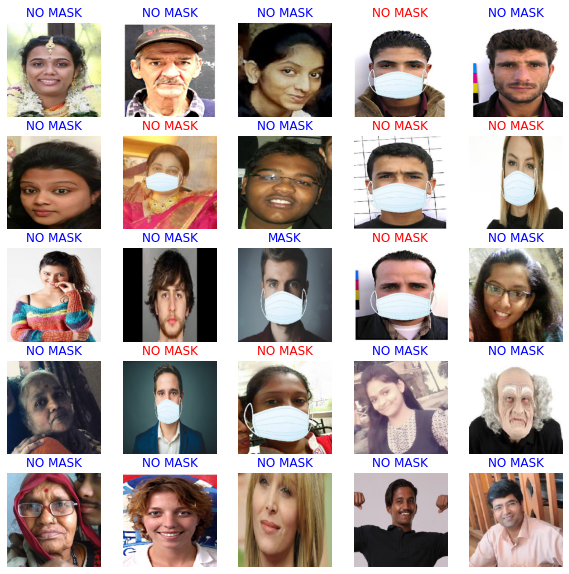

In [111]:
samples = sample_images.next()

predictions = np.squeeze(model.predict(samples[0]) >= 0.5).astype(np.int)
labels = samples[1].astype(np.int)

plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(samples[0][i])
    plt.axis('off')
    plt.title(("NO MASK" if predictions[i] == 1 else "MASK"), color=('blue' if labels[i] == predictions[i] else 'red'))
    #plt.title(("MASK" if predictions[i] == 0 else "NO MASK"), color=('blue' if labels[i] == predictions[i] else 'red'))   
    
plt.show()